# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [944]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [945]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [946]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='dc895cb5774c42ceaadd10ca782350dc')

In [947]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100)


In [948]:
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 4567


In [949]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en",  page_size=100)


In [950]:
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 1230


In [951]:
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [952]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,text,compound,positive,negative,neutral
0,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
2,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000
3,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773
4,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000


In [953]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [954]:
ethereum_df = pd.DataFrame(ethereum_sentiments)
ethereum_df = ethereum_df[cols]

ethereum_df.head()



,text,compound,positive,negative,neutral
0,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948
4,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [955]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.150079,0.055687,0.019545,0.924778
std,0.327391,0.066000,0.048820,0.080517
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.859000
50%,0.000000,0.050000,0.000000,0.948000
75%,0.396900,0.117000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [956]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.234315,0.080562,0.022854,0.896573
std,0.365954,0.079222,0.049105,0.093338
min,-0.779200,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.838250
50%,0.226300,0.074000,0.000000,0.912000
75%,0.498075,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.239000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest positive score with a mean of .075 compared to bitcoin with a mean of .055. 

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with a max of .883 compared to bitcoin with a max of .812.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score with a max of .347 compared to bitcoin with a max of .198. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [957]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [958]:
lemmatizer = WordNetLemmatizer()


In [959]:
# Expand the default stopwords list if necessary
sw_addons = {"yet", "also", "anyone", "since", "could", "youve", "youre", "take", "see"}

In [960]:
# Complete the tokenizer function


def tokenizer(text):
    """Tokenizes text."""


    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation   
    # Remove the stop words
    # Lemmatize Words into root words
      
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    lem = [lemmatizer.lemmatize(word, pos='a') for word in words]
    lem = [lemmatizer.lemmatize(word, pos='v') for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    return output



In [961]:
# Create a new tokens column for bitcoin
bitcoin_df['tokenized_text'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokenized_text
0,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visa, partner, cryptocurrency, startup, block..."
1,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, two, month, ra..."
2,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."
3,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773,"[watch, crypto, market, past, weeks, youll, no..."
4,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000,"[six, years, launch, mexico, base, crypotcurre..."


In [962]:
# Create a new tokens column for ethereum
ethereum_df['tokenized_text'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokenized_text
0,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
1,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currencies, ethereu..."
3,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investors,..."
4,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investors,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [963]:
from collections import Counter
from nltk import ngrams


In [964]:
bitcoin_text = ' '.join(bitcoin_df.text)

In [965]:
bitcoin_processed=tokenizer(bitcoin_text)

In [975]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))


{('file', 'photo'): 35, ('virtual', 'currency'): 31, ('reuters', 'bitcoin'): 29, ('reuters', 'dado'): 28, ('dado', 'ruvic'): 28, ('london', 'reuters'): 24, ('currency', 'bitcoin'): 23, ('char', 'reuters'): 22, ('reuters', 'staff'): 21, ('new', 'york'): 20}


In [967]:
ethereum_text = ' '.join(ethereum_df.text)

In [968]:
ethereum_processed = tokenizer(ethereum_text)

In [976]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))


{('file', 'photo'): 12, ('char', 'ethereum'): 11, ('char', 'bitcoin'): 11, ('virtual', 'currency'): 10, ('reuters', 'dado'): 9, ('dado', 'ruvic'): 9, ('new', 'york'): 9, ('ruvic', 'illustration'): 8, ('london', 'reuters'): 7, ('york', 'reuters'): 7}


In [970]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [977]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10
#bitcoin_string.apply(token_count)

[('reuters', 106),
 ('char', 98),
 ('bitcoin', 88),
 ('illustration', 44),
 ('currency', 38),
 ('file', 36),
 ('photo', 35),
 ('virtual', 33),
 ('london', 31),
 ('dado', 28)]

In [972]:
# Get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 96),
 ('ethereum', 58),
 ('bitcoin', 46),
 ('reuters', 31),
 ('illustration', 17),
 ('new', 16),
 ('cryptocurrency', 15),
 ('year', 15),
 ('blockchain', 15),
 ('currency', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [973]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

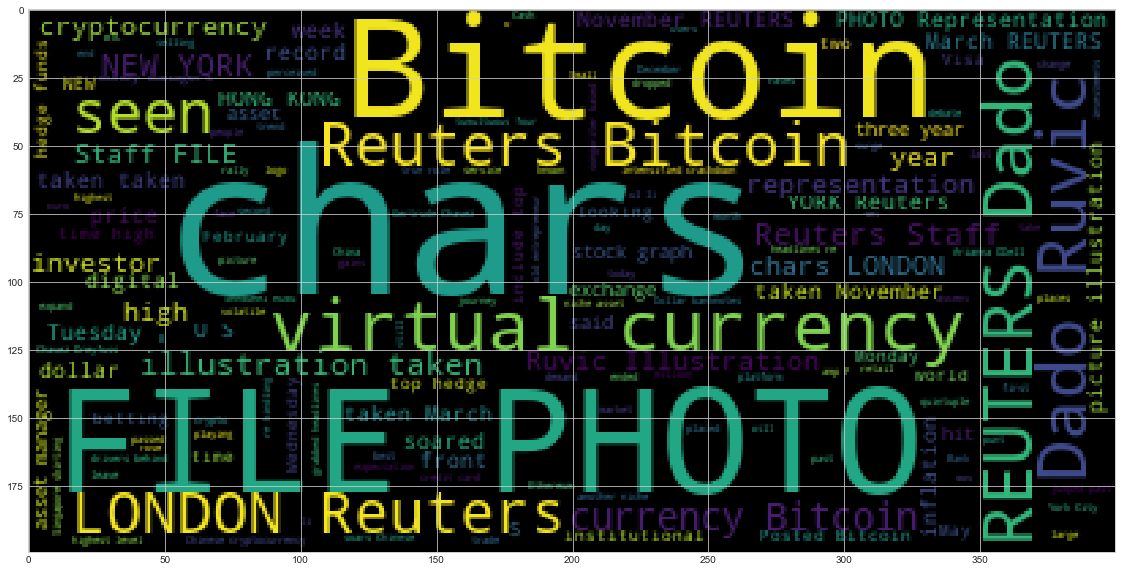

In [978]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

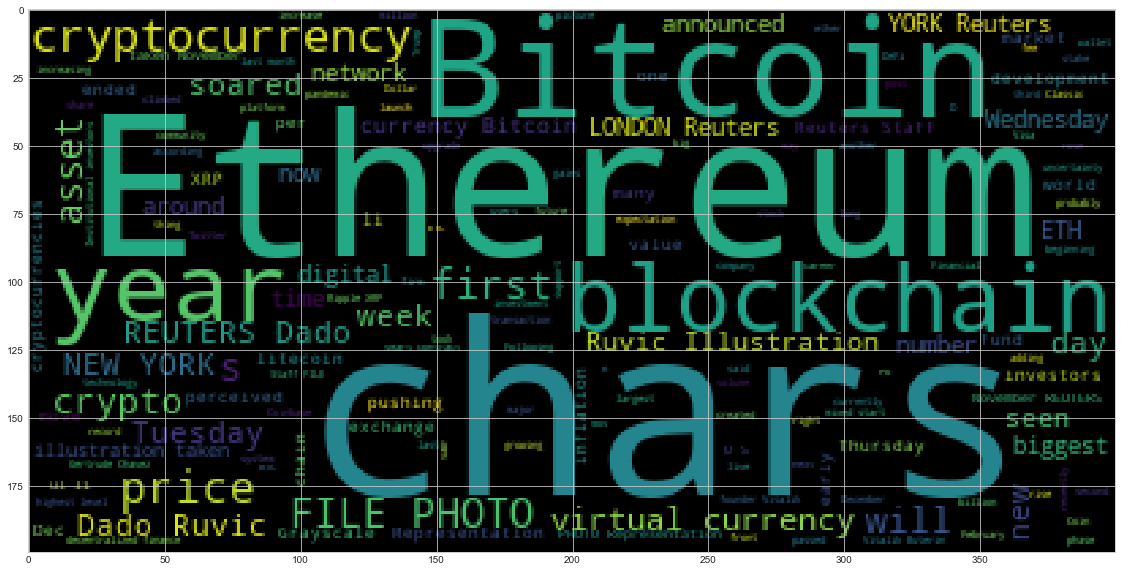

In [979]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [980]:
# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)

In [981]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [982]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [987]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])


['Visa', 'first', 'Bitcoin', 'November 2017', 'two-month', 'Bitcoin', '10,000', 'first', 'the next 20 days', '19,665', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Six years', 'Mexico', '$62 million', 'Decentralized', '4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Maisie Williams', 'Arya Stark', 'Lady Catelyn', 'Eddard', 'acolyte', 'the Faceless Men', 'Monday', '8', '7', 'Bitcoin', 'above $18,000', 'Tuesday', 'evening', 'December 2017', 'this week', 'more than $18,000', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Tom Wilson', 'Justin HarperBusiness', 'BBC News', 'Bitcoin', 'above $17,000', '12,800', 'three-year', 'Bitcoin', 'this week', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'February 3, 2018', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Monday', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 

---

## Ethereum NER

In [983]:
# Concatenate all of the bitcoin text together
ethereum_text = ' '.join(ethereum_df["text"])

In [984]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [985]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [986]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents])

['February 3, 2018', 'REUTERS/', 'Reuters', 'February 3, 2018', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Monday', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'PayPal', 'the Generosity Network', '20,000', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'The New York Times', 'Coinbase', 'early February this year', 'last month', 'October', '$24 million', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'LONDON', 'Reuters', 'Bitcoin', 'Hala Systems', 'Hedera', 'Syrians', 'Hala Systems', 'Bitcoin', 'the Plug and Play Tech Center', 'Sunnyvale', 'California', 'October 28, 2013', 'REUTERS/Stephen Lam', 'Bitcoin', 'ET